In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

import warnings
warnings.filterwarnings('ignore')
import datetime

In [2]:
data = pd.read_csv('dataset/movies.csv')

In [3]:
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
data.shape

(9125, 3)

In [5]:
rating = pd.read_csv('dataset/ratings.csv')

In [6]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
data = pd.merge(data,rating,on='movieId',how='inner')

In [8]:
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [9]:
data.drop(['movieId','userId','timestamp'],axis=1,inplace=True)

data

,title,genres,rating
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5
...,...,...,...
96806,Hell or High Water (2016),Crime|Drama,4.0
96807,Kingsglaive: Final Fantasy XV (2016),Action|Adventure|Animation|Drama|Fantasy|Sci-Fi,3.5
96808,Body (2015),Drama|Horror|Thriller,1.0
96809,Sharknado 4: The 4th Awakens (2016),Action|Adventure|Horror|Sci-Fi,1.5


In [10]:
#groupBy the dataset based on the movie title

data = pd.pivot_table(data,index=['title','genres'],aggfunc='mean')

data.reset_index(level=['title','genres'],inplace=True)

data.head()

,title,genres,rating
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000
1,'Round Midnight (1986),Drama|Musical,3.500000
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000
3,'Til There Was You (1997),Drama|Romance,4.000000
4,"'burbs, The (1989)",Comedy,3.176471


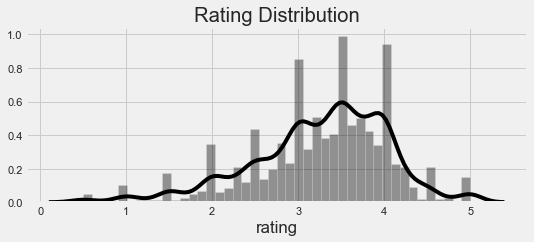

In [11]:
#distribution of the ratings accross the movies


plt.rcParams['figure.figsize'] = (8,3)

plt.style.use('fivethirtyeight')

sns.distplot(data['rating'],color='black')

plt.title('Rating Distribution')

plt.show()

In [12]:
#Extract year of the release from the movie title

data['y'] = data['title'].str.split(' ')
data['year'] = data['y'].apply(lambda x:x[-1])

#drop unnecessary y in the dataset

data = data.drop(['y'],axis = 1)

#removes openning and closing brackets from the string

data['year'] = data['year'].str.strip(')')
data['year'] = data['year'].str.strip('(')

#check values after extraction
pd.set_option('max_rows',110)
data['year'].value_counts()

2002    244
1996    240
1995    228
2001    227
1998    225
2000    225
1999    221
1997    217
2004    206
2006    204
1994    198
2003    197
2005    195
2007    195
2009    190
2008    189
2011    180
2010    179
2014    170
2013    166
1993    166
2012    160
2015    148
1988    133
1992    127
1987    123
1990    117
1989    115
1986    115
1991    111
1985    105
1984     77
1982     71
1983     67
1981     64
1980     63
2016     52
1979     48
1977     47
1978     46
1973     41
1974     39
1971     33
1959     32
1955     32
1975     32
1965     32
1962     32
1976     31
1964     31
1972     30
1966     30
1960     30
1963     29
1967     28
1968     28
1957     26
1953     26
1961     25
1958     24
1970     23
1956     22
1969     22
1954     20
1939     20
1942     20
1947     17
1940     17
1946     16
1948     16
1950     16
1951     16
1949     15
1941     15
1937     14
1952     13
1945     13
1944     12
1936     11
1938     10
1931      9
1932      8
1933      8
1934

In [13]:
# There are some Dirty Values, Let's Clean them
data['year'] = data['year'].replace(('2007-','Despot','Things', '1975-1979','Road', ''),
                                   ('2007','2016','2016','1979','2002','1996'))

# lets convert the year column into Integer data type
data['year'] = data['year'].astype(int)

# lets check the head of the dataset again
data.head()

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round Midnight (1986),Drama|Musical,3.500000,1986
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was You (1997),Drama|Romance,4.000000,1997
4,"'burbs, The (1989)",Comedy,3.176471,1989


In [14]:
# lets remove the Year from the Movie Titles
data['title'] = data['title'].str.split(' ')
data['title'] = data['title'].apply(lambda x: ' '.join(x[:-1]))


# lets check the head of the dataset again
data.head()

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation,Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round Midnight,Drama|Musical,3.500000,1986
2,'Salem's Lot,Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was You,Drama|Romance,4.000000,1997
4,"'burbs, The",Comedy,3.176471,1989
